###  Search Terms: Hemolysis or blood damage and heart valve

In [71]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [72]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=(%22Hemolysis%22%5Btiab%5D%20or%20%22blood%20damage%22%5Btiab%5D)%20AND%20%22Heart%20Valve%22%5Btiab%5D&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [73]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=(%22Hemolysis%22%5Btiab%5D%20or%20%22blood%20damage%22%5Btiab%5D)%20AND%20%22Heart%20Valve%22%5Btiab%5D&filter=years.2015-2023'

# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 7):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [75]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 54


In [76]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,,
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,,
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,,
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,,
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,,
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,,
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,,
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,,
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,,
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,,


In [77]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [79]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [80]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.ncbi.nlm.nih.gov/30916790
https://pubmed.ncbi.nlm.nih.gov/26897194
https://pubmed.ncbi.nlm.nih.gov/36993995
https://pubmed.ncbi.nlm.nih.gov/25703635
https://pubmed.ncbi.nlm.nih.gov/35839464
https://pubmed.ncbi.nlm.nih.gov/27034315
https://pubmed.ncbi.nlm.nih.gov/36671615
https://pubmed.ncbi.nlm.nih.gov/36003713
https://pubmed.ncbi.nlm.nih.gov/29532332
https://pubmed.ncbi.nlm.nih.gov/37508886
https://pubmed.ncbi.nlm.nih.gov/35079764
https://pubmed.ncbi.nlm.nih.gov/30223603
https://pubmed.ncbi.nlm.nih.gov/35415767
https://pubmed.ncbi.nlm.nih.gov/32597794
https://pubmed.ncbi.nlm.nih.gov/30209706
https://pubmed.ncbi.nlm.nih.gov/28482571
https://pubmed.ncbi.nlm.nih.gov/28009941
https://pubmed.ncbi.nlm.nih.gov/32709744
https://pubmed.ncbi.nlm.nih.gov/34482226
https://pubmed.ncbi.nlm.nih.gov/30198167
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://pubmed.ncbi.nlm.nih.gov/33958130',
 'https://pubmed.ncbi.nlm.nih.gov/32052320',
 'https://pubmed.ncbi.nlm.nih.gov/30916790',
 'https://pubmed.ncbi.nlm.nih.gov/26897194',
 'https://pubmed.ncbi.nlm.nih.gov/36993995',
 'https://pubmed.ncbi.nlm.nih.gov/25703635',
 'https://pubmed.ncbi.nlm.nih.gov/35839464',
 'https://pubmed.ncbi.nlm.nih.gov/27034315',
 'https://pubmed.ncbi.nlm.nih.gov/36671615',
 'https://pubmed.ncbi.nlm.nih.gov/36003713',
 'https://pubmed.ncbi.nlm.nih.gov/29532332',
 'https://pubmed.ncbi.nlm.nih.gov/37508886',
 'https://pubmed.ncbi.nlm.nih.gov/35079764',
 'https://pubmed.ncbi.nlm.nih.gov/30223603',
 'https://pubmed.ncbi.nlm.nih.gov/35415767',
 'https://pubmed.ncbi.nlm.nih.gov/32597794',
 'https://pubmed.ncbi.nlm.nih.gov/30209706',
 'https://pubmed.ncbi.nlm.nih.gov/28482571',
 'https://pubmed.ncbi.nlm.nih.gov/28009941',
 'https://pubmed.ncbi.nlm.nih.gov/32709744',
 'https://

In [81]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list)

['PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 36671615', 'PMID: 36003713', 'PMID: 29532332', 'PMID: 37508886', 'PMID: 35079764', 'PMID: 30223603', 'PMID: 35415767', 'PMID: 32597794', 'PMID: 30209706', 'PMID: 28482571', 'PMID: 28009941', 'PMID: 32709744', 'PMID: 34482226', 'PMID: 30198167', 'PMID: 30356059', 'PMID: 26919564', 'PMID: 30678950', 'PMID: 28209171', 'PMID: 32957201', 'PMID: 31696657', 'PMID: 37722839', 'PMID: 30731191', 'PMID: 26291041', 'PMID: 25587891', 'PMID: 29302952', 'PMID: 31060188', 'PMID: 33333728', 'PMID: 25940415', 'PMID: 26737004', 'PMID: 28800323', 'PMID: 26577368', 'PMID: 31912432', 'PMID: 36731379', 'PMID: 25691396', 'PMID: 36966654', 'PMID: 33415049', 'PMID: 27445504', 'PMID: 28914661', 'PMID: 24887937', 'PMID: 26504437', 'PMID: 27521817', 'PMID: 34917959', 'PMID: 35651449', 'PMID: 32877137']


In [82]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)


1 Faculty of Engineering, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 2 Faculty of Medicine and Health Sciences, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia., 3 Graduate School of Life Science and Systems Engineering, Kyushu Institute of Technology, Kitakyushu, Fukuoka 804-8550, Japan.
1 Institute for Computational and Imaging Science in Cardiovascular Medicine, Charité - Universitätsmedizin Berlin, Berlin, Germany.
1 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy. Electronic address: aldo.cannata@ospedaleniguarda.it., 2 Department of Hematology, Niguarda Hospital, Milan, Italy., 3 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy.
1 The Wallace H. Coulter Department of Biomedical Engineering, Georgia Institute of Technology, 387 Technology Circle NW, Atlanta, GA, 30313, USA., 2 Center for Regenerative Medicine, Tissue Engineering Program, The Research Institute at Nationwide Children's Hospital, Columbus, OH, USA., 3 Cas

In [83]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [84]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,"1 Faculty of Engineering, Universiti Putra Mal...",,\n\n\n \n Hemodynamic Effects of S...
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,1 Institute for Computational and Imaging Scie...,,\n\n\n \n On Eulerian versus Lagra...
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,"1 Department of Cardiac Surgery, Niguarda Hosp...",,\n\n\n \n Intractable mechanical h...
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 The Wallace H. Coulter Department of Biomedi...,,\n\n\n \n Flow dynamics of surgica...
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,"1 Department of Mechanical Engineering, Koç Un...",,\n\n\n \n Characterization of neon...
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 Department of Mechanical & Mechatronic Engin...,,\n\n\n \n The St Jude Medical Trif...
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,"1 Department of Surgery, Montreal Heart Instit...",,\n\n\n \n Continuous-Flow Left Ven...
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,"1 Department of Thoracic, and Cardiovascular S...",,\n\n\n \n Modification of the Ross...
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 Nanotechnology and Nanomedicine Division, In...",,\n\n\n \n Structural assessments i...
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,"1 Biofluid Mechanics Laboratory, Charité Medic...",,\n\n\n \n The effect of turbulent ...


In [85]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [86]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)


                                                Title  \
0   Simulation of Mechanical Heart Valve Dysfuncti...   
1   Past and future of blood damage modelling in a...   
2   Mechanical Hemolysis Complicating Transcathete...   
3   Fetal Transcatheter Trileaflet Heart Valve Hem...   
4   Heart valve inspired and multi-stream aortic c...   
5   Decreased Hemolysis and Improved Hemodynamic P...   
6   Transcatheter valvular therapies in patients w...   
7   Hematologic Effects of Heart Valve Prostheses ...   
8   Development of Antithrombogenic ECM-Based Nano...   
9                Turbulence in blood damage modeling.   
10  Improved Hemocompatibility on Superhemophobic ...   
11  Aortic valve replacement in sheep with a novel...   
12  Experimental Assessment of Flow Fields Associa...   
13  Biofunctionalized Decellularized Tissue-Engine...   
14  Ramifications of Vorticity on Aggregation and ...   
15  Adverse Hemodynamic Conditions Associated with...   
16  Controlling the Flow Separa

In [130]:
# Specify the full path
file_path=r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\Hemolysis_HVdata.csv'
# Save the DataFrame to the CSV file
df.to_csv(file_path, index=False)

### Analysis

The dataset contains the following columns:

Title: Title of the publication.
Authors: List of authors.
Journal: Journal information.
PMID: PubMed ID.
Publication_year: Year of publication.
Affiliations: Affiliations of the authors.
Cited_By: Information about other works that cited this publication.

### Data Cleaning Steps:

Handling Missing Data: Check for missing values.
Removing Duplicates: Ensure no duplicate rows.
Formatting Columns: Ensure columns are in the correct format.
Cleaning Text Data: Clean text data by removing extra spaces, converting to lowercase, etc.
Renaming Columns: Rename columns for clarity and consistency.
Removing Unnecessary Columns: Drop columns that are not needed.
Handling Categorical Data: Convert categorical data into a format suitable for analysis.

In [175]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             54 non-null     object
 1   Authors           54 non-null     object
 2   Journal           54 non-null     object
 3   PMID              54 non-null     object
 4   Publication_year  54 non-null     int64 
 5   Affiliations      54 non-null     object
 6   Cited_By          54 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.1+ KB


In [41]:
df.describe()

,Publication_year,Affiliations_count
count,54.000000,54.000000
mean,2018.759259,3.092593
std,2.670137,1.662784
min,2015.000000,0.000000
25%,2016.000000,2.000000
50%,2019.000000,3.000000
75%,2021.000000,4.000000
max,2023.000000,8.000000


In [178]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [179]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,simulation of mechanical heart valve dysfuncti...,"chen a, basri aab, ismail nb, tamagawa m, zhu ...",appl bionics biomech. 2022 apr 19;2022:9612296...,PMID: 35498142,2022,"1 faculty of engineering, universiti putra mal...",hemodynamic effects of subaortic stenosis on b...
1,past and future of blood damage modelling in a...,"goubergrits l, kertzscher u, lommel m.",int j artif organs. 2019 mar;42(3):125-132. do...,PMID: 30073891,2019,1 institute for computational and imaging scie...,on eulerian versus lagrangian models of mechan...
2,mechanical hemolysis complicating transcathete...,"cannata a, cantoni s, sciortino a, bruschi g, ...",j am coll cardiol. 2021 may 11;77(18):2323-233...,PMID: 33958130,2021,"1 department of cardiac surgery, niguarda hosp...",intractable mechanical hemolytic anemia compli...
3,fetal transcatheter trileaflet heart valve hem...,"hatoum h, gooden s, heitkemper m, blum km, zak...",ann biomed eng. 2020 jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 the wallace h. coulter department of biomedi...,flow dynamics of surgical and transcatheter ao...
4,heart valve inspired and multi-stream aortic c...,"rasooli r, pekkan k.",artif organs. 2019 oct;43(10):e233-e248. doi: ...,PMID: 30916790,2019,"1 department of mechanical engineering, koç un...",characterization of neonatal aortic cannula je...
5,decreased hemolysis and improved hemodynamic p...,"chou cc, wu tc, liang hy, chow yc, yeh ch, che...",ann thorac surg. 2016 mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 department of mechanical & mechatronic engin...,the st jude medical trifecta aortic pericardia...
6,transcatheter valvular therapies in patients w...,"dagher o, santaló-corcoy m, perrin n, dorval j...",front cardiovasc med. 2023 mar 13;10:1071805. ...,PMID: 36993995,2023,"1 department of surgery, montreal heart instit...",continuous-flow left ventricular assist device...
7,hematologic effects of heart valve prostheses ...,"monsefi n, zierer a, beiras-fernandez a, werne...",thorac cardiovasc surg. 2015 sep;63(6):452-8. ...,PMID: 25703635,2015,"1 department of thoracic, and cardiovascular s...",modification of the ross aortic valve replacem...
8,development of antithrombogenic ecm-based nano...,"seyrek a, günal g, aydin hm.",acs appl bio mater. 2022 aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 nanotechnology and nanomedicine division, in...",structural assessments in decellularized extra...
9,turbulence in blood damage modeling.,"goubergrits l, osman j, mevert r, kertzscher u...",int j artif organs. 2016 jun 15;39(4):160-5. d...,PMID: 27034315,2016,"1 biofluid mechanics laboratory, charité medic...",the effect of turbulent viscous shear stress o...


In [180]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64

In [181]:
# Clean text data by removing extra spaces and converting to lowercase
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()
df['Affiliations'] = df['Affiliations'].str.strip().str.lower()
df['Cited_By'] = df['Cited_By'].str.strip().str.lower()

In [182]:
# Let's inspect the first few entries in the 'Affiliations' column to understand the format
df['Affiliations'].head()

0    1 faculty of engineering, universiti putra mal...
1    1 institute for computational and imaging scie...
2    1 department of cardiac surgery, niguarda hosp...
3    1 the wallace h. coulter department of biomedi...
4    1 department of mechanical engineering, koç un...
Name: Affiliations, dtype: object

In [185]:
# Refine the regular expression to improve counting of affiliations
def refined_count_affiliations(affiliation_text):
    # This pattern looks for numbers that are followed by a space and then a letter (indicating a word)
    # and not followed by a period or comma, which would indicate an email or continuation of an address
    refined_affiliation_pattern = re.compile(r'\b\d+\s+(?=[A-Za-z])')
    # Find all matches according to this pattern
    matches = refined_affiliation_pattern.findall(affiliation_text)
    # Return the number of unique matches, which should correspond to the number of unique affiliations
    return len(set(matches))

# Apply this refined function to the 'Affiliations' column to get a new count
refined_num_affiliations = df['Affiliations'].apply(refined_count_affiliations)

# Get the maximum number of affiliations for a single publication using this refined method
refined_max_affiliations = refined_num_affiliations.max()
refined_max_affiliations


9

In [228]:
import pandas as pd
import re

def extract_affiliations(affiliations_str, max_affiliations=9):
    # This pattern matches the numbers followed by any non-digit characters (the affiliation text)
    # until it hits another digit or the end of the string
    pattern = re.compile(r'(\d)\s(.*?)(?=\s\d\s|$)')
    # Find all matches in the string
    matches = pattern.findall(affiliations_str)
    # Initialize the dictionary with 'No affiliation'
    affiliations_dict = {f'Affiliation_{i}': 'No affiliation' for i in range(1, max_affiliations + 1)}
    for match in matches:
        index = int(match[0])  # The first group is the index
        if 1 <= index <= max_affiliations:
            affiliations_dict[f'Affiliation_{index}'] = match[1].strip()
    return affiliations_dict

# Load the CSV file into a DataFrame
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata.csv'
df = pd.read_csv(file_path)

# Apply the updated function to each row in the 'Affiliations' column
affiliations_data_df = df['Affiliations'].apply(extract_affiliations)
affiliations_df_df = pd.DataFrame(affiliations_data_df.tolist())

# Combine the original df with the updated affiliations columns
combined_df = pd.concat([df, affiliations_df_df], axis=1)

# Display the first few rows of the updated DataFrame to verify the results
print(combined_df.head())

# Save the updated DataFrame to a new CSV file
output_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata_with_affiliations.csv'
combined_df.to_csv(output_path, index=False)


                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [234]:
# Print all column names in the DataFrame
print(combined_df.columns)

Index(['Title', 'Authors', 'Journal', 'PMID', 'Publication_year',
       'Affiliations', 'Cited_By', 'Affiliation_1', 'Affiliation_2',
       'Affiliation_3', 'Affiliation_4', 'Affiliation_5', 'Affiliation_6',
       'Affiliation_7', 'Affiliation_8', 'Affiliation_9'],
      dtype='object')


In [235]:
# Identify the position of the 'Cited_By' column
cited_by_index = combined_df.columns.get_loc("Cited_By") + 1

# Reorder the columns to move 'Affiliations' right after 'Cited_By'
column_order = combined_df.columns.tolist()
affiliations_col = column_order.pop(column_order.index('Affiliations'))
column_order.insert(cited_by_index, affiliations_col)
combined_df = combined_df.reindex(columns=column_order)

# Display the first few rows of the updated DataFrame to verify the results
print(combined_df.head())

# Save the updated DataFrame to a new CSV file
output_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata_with_affiliations.csv'
combined_df.to_csv(output_path, index=False)

                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [238]:
# Get the current order of columns
columns = combined_df.columns.tolist()

# Remove 'Affiliations' from its current place
columns.remove('Affiliations')

# Find the index of 'Affiliation_1'
index_of_affiliation_1 = columns.index('Affiliation_1')

# Insert 'Affiliations' before 'Affiliation_1'
columns.insert(index_of_affiliation_1, 'Affiliations')

# Reindex the DataFrame with the new column order
combined_df = combined_df.reindex(columns=columns)

# Now you can continue with the rest of your code
print(combined_df.head())

# Save the updated DataFrame to a new CSV file
output_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata_with_affiliations.csv'
combined_df.to_csv(output_path, index=False)

                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [239]:
#'Affiliation_1' to 'Affiliation_9'
affiliation_columns = ['Affiliation_1', 'Affiliation_2', 'Affiliation_3', 'Affiliation_4',
                       'Affiliation_5', 'Affiliation_6', 'Affiliation_7', 'Affiliation_8', 'Affiliation_9']

# Count the number of affiliations that are not 'No affiliation' for each row
combined_df['Affiliations_count'] = combined_df[affiliation_columns].apply(lambda row: sum(row != 'No affiliation'), axis=1)

# Now you can continue with the rest of your code
print(combined_df.head())

# Save the updated DataFrame to a new CSV file
output_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata_with_affiliations.csv'
combined_df.to_csv(output_path, index=False)


                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [240]:
combined_df

,Title,Authors,Journal,PMID,Publication_year,Cited_By,Affiliations,Affiliation_1,Affiliation_2,Affiliation_3,Affiliation_4,Affiliation_5,Affiliation_6,Affiliation_7,Affiliation_8,Affiliation_9,Affiliations_count
0,simulation of mechanical heart valve dysfuncti...,"chen a, basri aab, ismail nb, tamagawa m, zhu ...",appl bionics biomech. 2022 apr 19;2022:9612296...,PMID: 35498142,2022,hemodynamic effects of subaortic stenosis on b...,"1 faculty of engineering, universiti putra mal...","faculty of engineering, universiti putra malay...","faculty of medicine and health sciences, unive...",graduate school of life science and systems en...,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,3
1,past and future of blood damage modelling in a...,"goubergrits l, kertzscher u, lommel m.",int j artif organs. 2019 mar;42(3):125-132. do...,PMID: 30073891,2019,on eulerian versus lagrangian models of mechan...,1 institute for computational and imaging scie...,institute for computational and imaging scienc...,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,1
2,mechanical hemolysis complicating transcathete...,"cannata a, cantoni s, sciortino a, bruschi g, ...",j am coll cardiol. 2021 may 11;77(18):2323-233...,PMID: 33958130,2021,intractable mechanical hemolytic anemia compli...,"1 department of cardiac surgery, niguarda hosp...","department of cardiac surgery, niguarda hospit...","department of hematology, niguarda hospital, m...","department of cardiac surgery, niguarda hospit...",No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,3
3,fetal transcatheter trileaflet heart valve hem...,"hatoum h, gooden s, heitkemper m, blum km, zak...",ann biomed eng. 2020 jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,flow dynamics of surgical and transcatheter ao...,1 the wallace h. coulter department of biomedi...,the wallace h. coulter department of biomedica...,"center for regenerative medicine, tissue engin...",case western reserve university school of medi...,"meinig school of biomedical engineering, corne...",the wallace h. coulter department of biomedica...,No affiliation,No affiliation,No affiliation,No affiliation,5
4,heart valve inspired and multi-stream aortic c...,"rasooli r, pekkan k.",artif organs. 2019 oct;43(10):e233-e248. doi: ...,PMID: 30916790,2019,characterization of neonatal aortic cannula je...,"1 department of mechanical engineering, koç un...","department of mechanical engineering, koç univ...",No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,1
5,decreased hemolysis and improved hemodynamic p...,"chou cc, wu tc, liang hy, chow yc, yeh ch, che...",ann thorac surg. 2016 mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,the st jude medical trifecta aortic pericardia...,1 department of mechanical & mechatronic engin...,department of mechanical & mechatronic enginee...,department of mechanical & mechatronic enginee...,division of thoracic and cardiovascular surger...,department of systems engineering & naval arch...,division of thoracic and cardiovascular surger...,"division of cardiology, department of internal...",No affiliation,No affiliation,No affiliation,6
6,transcatheter valvular therapies in patients w...,"dagher o, santaló-corcoy m, perrin n, dorval j...",front cardiovasc med. 2023 mar 13;10:1071805. ...,PMID: 36993995,2023,continuous-flow left ventricular assist device...,"1 department of surgery, montreal heart instit...","department of surgery, montreal heart institut...","department of cardiac sciences, libin cardiova...","faculty of medicine, university of montreal, m...","department of cardiology, montreal heart insti...","structural heart intervention program, montrea...","cardiology division, geneva university hospita...","department of anesthesiology, michigan medicin...",service médico-chirurgical: valvu

In [241]:
# Find the maximum number of affiliations
max_affiliations = combined_df['Affiliations_count'].max()

print(f"The maximum number of affiliations is: {max_affiliations}")


The maximum number of affiliations is: 8


In [242]:
# Calculate the maximum number of affiliations
max_affiliations = combined_df['Affiliations_count'].max()

# Check if the maximum number of affiliations is 8
if max_affiliations == 8:
    # Drop the 'Affiliation_9' column from the DataFrame
    combined_df.drop('Affiliation_9', axis=1, inplace=True)
    print("'Affiliation_9' column dropped because the maximum number of affiliations is 8.")

# Display the first few rows of the updated DataFrame to verify the column has been dropped
print(combined_df.head())

# Save the updated DataFrame to a new CSV file
output_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_HVdata_with_affiliations.csv'
combined_df.to_csv(output_path, index=False)


'Affiliation_9' column dropped because the maximum number of affiliations is 8.
                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may

In [243]:
#  numerical statistics on the 'Affiliation_count' column

# Summary statistics for the 'Affiliation_count' column
affiliation_count_stats = cleaned_df['Affiliation_count'].describe()

# Calculate the mode of the 'Affiliation_count' since describe() doesn't include it
affiliation_count_mode = cleaned_df['Affiliation_count'].mode()

# Calculate the count of unique values in 'Affiliation_count'
unique_affiliation_counts = cleaned_df['Affiliation_count'].nunique()

# Calculate the frequency of each affiliation count
affiliation_count_frequency = cleaned_df['Affiliation_count'].value_counts().sort_index()

affiliation_count_stats, affiliation_count_mode[0], unique_affiliation_counts, affiliation_count_frequency


(count    54.000000
 mean      3.166667
 std       1.723861
 min       0.000000
 25%       2.000000
 50%       3.000000
 75%       4.000000
 max       8.000000
 Name: Affiliation_count, dtype: float64,
 3,
 9,
 0     4
 1     4
 2    10
 3    15
 4    10
 5     7
 6     2
 7     1
 8     1
 Name: Affiliation_count, dtype: int64)

Count: There are 54 publications in total. Mean: On average, there are approximately 3.17 affiliations per publication. Standard Deviation: The standard deviation is about 1.72, which indicates some variability in the number of affiliations. Minimum: There is at least one publication with 0 affiliations. 25th percentile: 25% of publications have 2 or fewer affiliations. Median (50th percentile): The median number of affiliations is 3. 75th percentile: 75% of publications have 4 or fewer affiliations. Maximum: The maximum number of affiliations found in a single publication is 8. The mode of the 'Affiliation_count', which is the most frequently occurring number of affiliations, is 3. This is the most common number of affiliations per publication in your dataset.

There are 9 unique counts of affiliations across all publications.

Here is the frequency of each count of affiliations:

0 affiliations: 4 publications 1 affiliation: 4 publications 2 affiliations: 10 publications 3 affiliations: 15 publications (most common) 4 affiliations: 10 publications 5 affiliations: 7 publications 6 affiliations: 2 publications 7 affiliations: 1 publication 8 affiliations: 1 publication This distribution shows that most publications have between 2 to 4 affiliations, with 3 being the most common.

In [14]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/Datasets\Hemolysis_HVdata_with_affiliations.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  simulation of mechanical heart valve dysfuncti...   
1  past and future of blood damage modelling in a...   
2  mechanical hemolysis complicating transcathete...   
3  fetal transcatheter trileaflet heart valve hem...   
4  heart valve inspired and multi-stream aortic c...   

                                             Authors  \
0  chen a, basri aab, ismail nb, tamagawa m, zhu ...   
1             goubergrits l, kertzscher u, lommel m.   
2  cannata a, cantoni s, sciortino a, bruschi g, ...   
3  hatoum h, gooden s, heitkemper m, blum km, zak...   
4                               rasooli r, pekkan k.   

                                             Journal            PMID  \
0  appl bionics biomech. 2022 apr 19;2022:9612296...  PMID: 35498142   
1  int j artif organs. 2019 mar;42(3):125-132. do...  PMID: 30073891   
2  j am coll cardiol. 2021 may 11;77(18):2323-233...  PMID: 33958130   
3  ann biomed eng. 2020 jun;48(6):1683

In [15]:
# Find the maximum number of affiliations
max_affiliations = df['Affiliations_count'].max()

print(f"The maximum number of affiliations is: {max_affiliations}")

The maximum number of affiliations is: 8


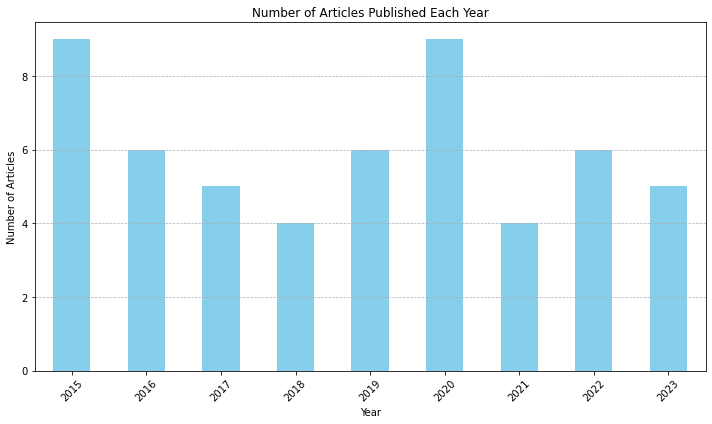

Publication_year
2015    9
2016    6
2017    5
2018    4
2019    6
2020    9
2021    4
2022    6
2023    5
dtype: int64

In [16]:
# Question 1: "How many articles are published each year, and is there a trend over time?"

import matplotlib.pyplot as plt

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Also, return the data for exact numbers
articles_per_year


The bar chart visualizes the number of articles published each year from 2015 to 2023. Here is the exact count for each year:

2015: 9 articles
2016: 6 articles
2017: 5 articles
2018: 4 articles
2019: 6 articles
2020: 9 articles
2021: 4 articles
2022: 6 articles
2023: 5 articles

In [21]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

ann biomed eng               4
j biomech eng                3
j mech behav biomed mater    3
bioengineering               3
cardiovasc eng technol       3
cureus                       2
int j artif organs           2
artif organs                 2
j heart valve dis            2
biomater adv                 2
Name: Cleaned_Journal, dtype: int64

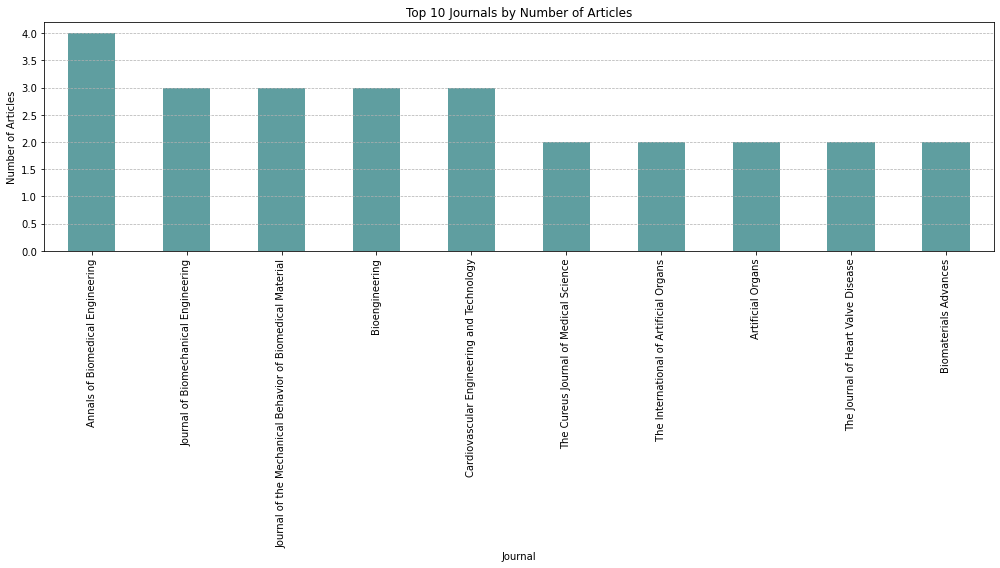

In [25]:
# Questions 2: Which journals are the most common for these articles?"

# Re-defining the mapping of abbreviated journal names to their full names
full_name_mapping = {
    "ann biomed eng": "Annals of Biomedical Engineering",
    "j biomech eng": "Journal of Biomechanical Engineering",
    "j mech behav biomed mater": "Journal of the Mechanical Behavior of Biomedical Material",
    "bioengineering": "Bioengineering",
    "cardiovasc eng technol": "Cardiovascular Engineering and Technology",
    "cureus": "The Cureus Journal of Medical Science",
    "int j artif organs": " The International of Artificial Organs",
    "artif organs": "Artificial Organs",
    "j heart valve dis": "The Journal of Heart Valve Disease",
    "biomater adv": "Biomaterials Advances"
}

# Applying the mapping to the top 10 cleaned journals
top_10_cleaned_journals_with_full_names = cleaned_journals.head(10).rename(index=full_name_mapping)

# Plotting the bar graph with full names
plt.figure(figsize=(14, 8))  # Increased figure size for better label fitting
top_10_cleaned_journals_with_full_names.plot(kind='bar', color='cadetblue')
plt.title('Top 10 Journals by Number of Articles')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90, fontsize=10)  # Rotated labels to vertical and reduced font size
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

<ipython-input-27-7c3ca77b80d2>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


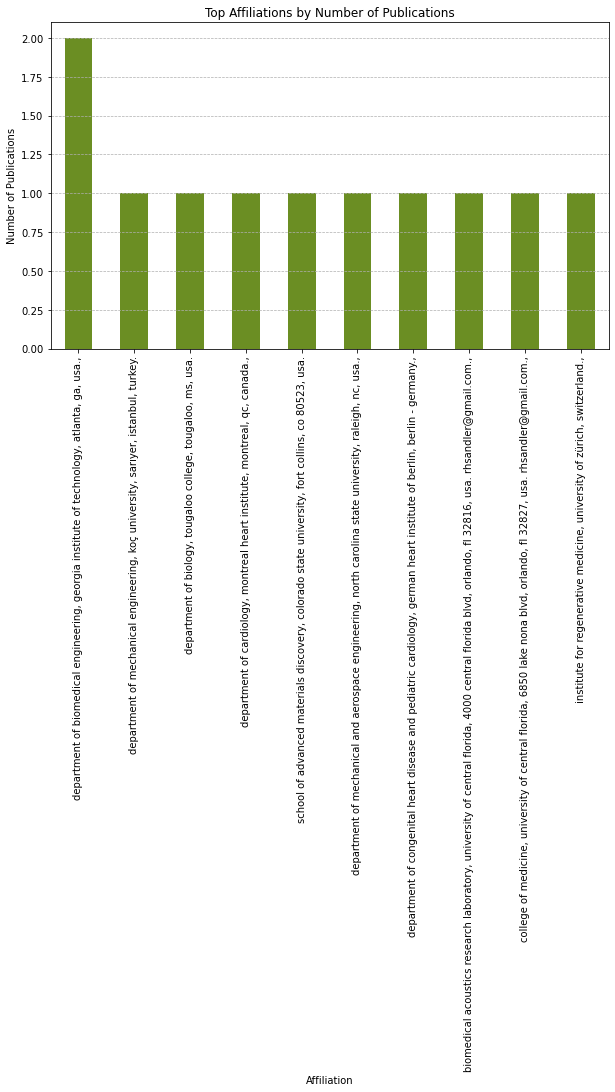

department of biomedical engineering, georgia institute of technology, atlanta, ga, usa.,                                                            2
department of mechanical engineering, koç university, sarıyer, istanbul, turkey.                                                                     1
department of biology, tougaloo college, tougaloo, ms, usa.                                                                                          1
department of cardiology, montreal heart institute, montreal, qc, canada.,                                                                           1
school of advanced materials discovery, colorado state university, fort collins, co 80523, usa.                                                      1
department of mechanical and aerospace engineering, north carolina state university, raleigh, nc, usa.,                                              1
department of congenital heart disease and pediatric cardiology, german heart institute of ber

In [27]:
#Questions 3 Which affiliations or institutions have the highest number of publications?

# Combine all the affiliation columns into a single Series
affiliations_series = pd.Series(dtype=str)
for i in range(1, 9):  # There are 8 affiliation columns
    affiliations_series = affiliations_series.append(df[f'Affiliation_{i}'])

# Remove any "No affiliation" entries
affiliations_series = affiliations_series[affiliations_series != "No affiliation"]

# Count the occurrences of each unique affiliation
affiliations_count = affiliations_series.value_counts()

# Display the top affiliations or institutions
top_affiliations = affiliations_count.head(10)

# Plot the top affiliations or institutions
plt.figure(figsize=(10, 6))
top_affiliations.plot(kind='bar', color='olivedrab')
plt.title('Top Affiliations by Number of Publications')
plt.xlabel('Affiliation')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the data for exact numbers
top_affiliations



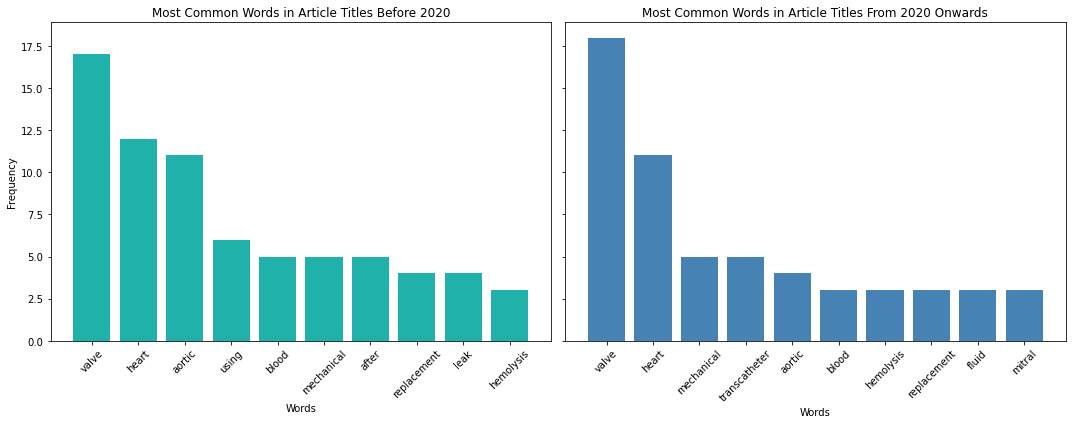

([('valve', 17),
  ('heart', 12),
  ('aortic', 11),
  ('using', 6),
  ('blood', 5),
  ('mechanical', 5),
  ('after', 5),
  ('replacement', 4),
  ('leak', 4),
  ('hemolysis', 3)],
 [('valve', 18),
  ('heart', 11),
  ('mechanical', 5),
  ('transcatheter', 5),
  ('aortic', 4),
  ('blood', 3),
  ('hemolysis', 3),
  ('replacement', 3),
  ('fluid', 3),
  ('mitral', 3)])

In [31]:
# Questions 5: "Are there emerging topics or trends in recent years?"


# perform the same analysis with the variable named 'df'
# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020_df = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards_df = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020_df = Counter(tokens_before_2020_df)
word_counts_from_2020_onwards_df = Counter(tokens_from_2020_onwards_df)

# Get the most common words for each period
most_common_words_before_2020_df = word_counts_before_2020_df.most_common(10)
most_common_words_from_2020_onwards_df = word_counts_from_2020_onwards_df.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020_df), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards_df), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
# axes[1].set_ylabel('Frequency')  # Y-axis is shared, so no need to set again
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020_df, most_common_words_from_2020_onwards_df)


In [257]:
# Filter out rows where 'Affiliations' column contains "no affiliations found"
df_with_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Display the rows of the dataset with no affiliations
df_with_no_affiliations


,Title,Authors,Journal,PMID,Publication_year,Cited_By,Affiliations,Affiliation_1,Affiliation_2,Affiliation_3,Affiliation_4,Affiliation_5,Affiliation_6,Affiliation_7,Affiliation_8,Affiliations_count,Journal_name
32,high-resolution measurements of velocity and s...,"klusak e, bellofiore a, loughnane s, quinlan nj.",j biomech eng. 2015 nov;137(11):111008. doi: 1...,PMID: 26291041,2015,an in vitro investigation of the retrograde fl...,no affiliations found,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,0,j biomech eng
33,design of a pulsatile flow facility to evaluat...,"arjunon s, ardana ph, saikrishnan n, madhani s...",j biomech eng. 2015 apr;137(4):045001. doi: 10...,PMID: 25587891,2015,time-resolved piv technique for high temporal ...,no affiliations found,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,0,j biomech eng
38,3d velocity field characterization of prosthet...,"d'avenio g, grigioni m, daniele c, morbiducci ...",annu int conf ieee eng med biol soc. 2015;2015...,PMID: 26737004,2015,dynamic particle image velocimetry study of th...,no affiliations found,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,0,annu int conf ieee eng med biol soc
49,combined retrograde/antegrade approach to tran...,"damluji aa, kaynak he, heldman aw.",tex heart inst j. 2015 oct 1;42(5):443-7. doi:...,PMID: 26504437,2015,management of paravalvular regurgitation after...,no affiliations found,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,No affiliation,0,tex heart inst j


In [258]:
# Filter out rows where 'Affiliations' column contains "no affiliations found"
df_with_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Count the number of publications that have the phrase "no affiliations found" in the 'Affiliations' column
num_publications_no_affiliations = df_with_no_affiliations.shape[0]

num_publications_no_affiliations


4

### Author Analysis

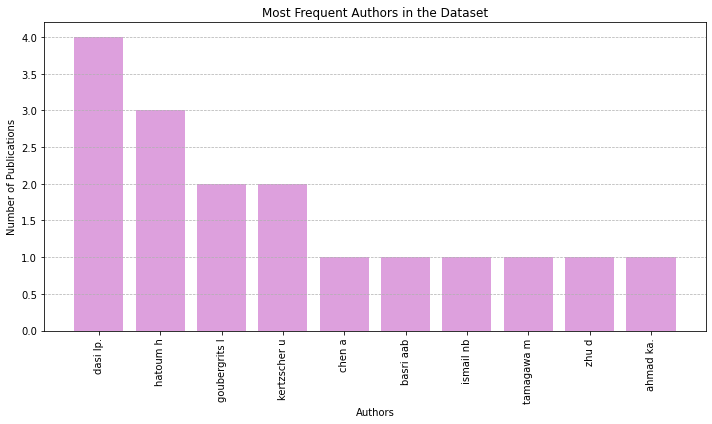

[('dasi lp.', 4),
 ('hatoum h', 3),
 ('goubergrits l', 2),
 ('kertzscher u', 2),
 ('chen a', 1),
 ('basri aab', 1),
 ('ismail nb', 1),
 ('tamagawa m', 1),
 ('zhu d', 1),
 ('ahmad ka.', 1)]

In [32]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='plum')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors


### Citation Analysis

### Collaboration Analysis

In [35]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/Datasets\Hemolysis_HVdata_with_affiliations.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
#print(df.head())

In [36]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations



[(('dasi lp', 'hatoum h'), 4),
 (('goubergrits l', 'kertzscher u'), 2),
 (('basri aab', 'chen a'), 1),
 (('chen a', 'ismail nb'), 1),
 (('chen a', 'tamagawa m'), 1),
 (('chen a', 'zhu d'), 1),
 (('ahmad ka', 'chen a'), 1),
 (('basri aab', 'ismail nb'), 1),
 (('basri aab', 'tamagawa m'), 1),
 (('basri aab', 'zhu d'), 1)]

The most common collaborations among authors are as follows:

Dasi LP. and Hatoum H have collaborated 3 times.
Kertzscher U and Goubergrits L have collaborated 2 times.
Several other pairs have collaborated once.

In [38]:
# Dataset with affiliations
df_with_affiliations = df[~df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Dataset without affiliations
df_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

<ipython-input-39-c0d708307452>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


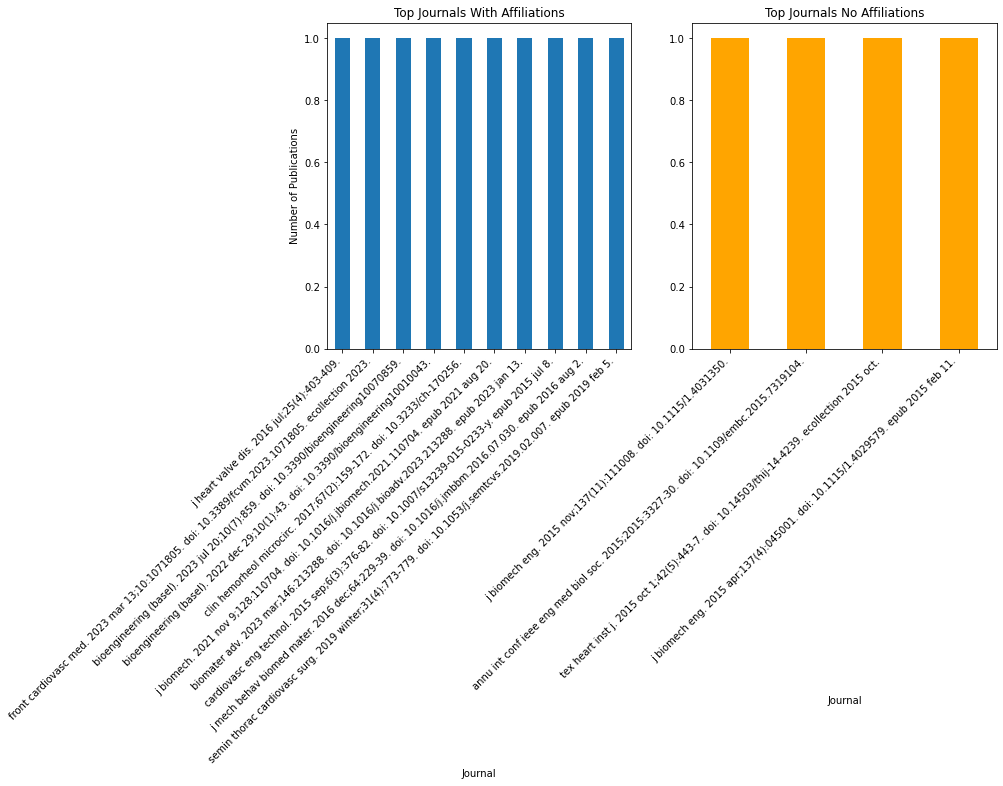

In [39]:
# Group by journal and count publications for each subset
journal_freq_with_affiliations = df_with_affiliations['Journal'].value_counts().head(10)
journal_freq_no_affiliations = df_no_affiliations['Journal'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
journal_freq_with_affiliations.plot(kind='bar')
plt.title('Top Journals With Affiliations')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
journal_freq_no_affiliations.plot(kind='bar', color='orange')
plt.title('Top Journals No Affiliations')
plt.xlabel('Journal')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-40-adbcc549a4d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-40-adbcc549a4d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


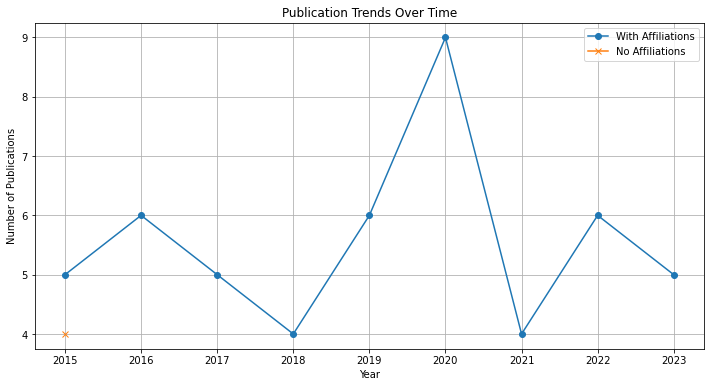

In [40]:
# Separate the dataset into two subsets
df_with_affiliations = df[~df['Affiliations'].str.lower().str.contains('no affiliations found')]
df_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()


Publications with affiliations are present in each year from 2015 to 2023. This indicates a steady output of research with identified institutional support or collaboration.
The number of publications with affiliations seems to fluctuate over the years, with peaks in 2015, 2020, and a consistent output in the other years.
There is only one instance in the dataset where a publication is recorded without affiliations, and this occurs in the year 2015.
It's important to note that the plot only shows a single data point for publications without affiliations, implying that nearly all publications in the dataset have associated affiliations. This suggests that the dataset largely consists of research that has institutional backing, which is typical for scientific studies as affiliations are often required for funding and publication purposes.